# How Injection Testing Works

.. note::
   This is a demonstration of how injection testing works in ALIAS. For a tutorial on how to use the `alias.injection` submodule, please see [this tutorial](/notebooks/injection_testing_tutorial.html).

Injection testing is a process of testing a signal detection algorithm by simulating what the signal would look like in context and then running the algorithm on it to determine if it is able to recover the signal and how accurately it can characterize it. ALIAS is a great candidate for this style of testing since it is trying to detect signals that are fairly easy to impliment.

Before doing else, we must load the testing dataset.

## Simulating LASER Technosignatures

Due to how they operate, LASER's have very narrow bands of emission, this effectively means that there is very little line broadening except for that imparted by the instrument itself. This means that, to a good first approximation, a LASER signature in a spectrum would look like the instrument's line spread function (LSF).

A line spread function is available for APOGEE, which can be downloaded from Zenodo [here](https://zenodo.org/record/16147#.YuBc-C-B2v4).

Note that this LSF is from APOGEE Data Release 12, which makes it fairly out of data. ALIAS was designed to be able to use any LSF, so should a more recent one become available, it is recommended to use that instead.

In [3]:
from astropy.io import fits

file = 'data/apogee-lsf-dr12-all.fits'
hdul = fits.open(file)
data = hdul[0].data

This file contains many different measurements of the LSF, under various different circumstances. We will use the median of them, which is plotted here.

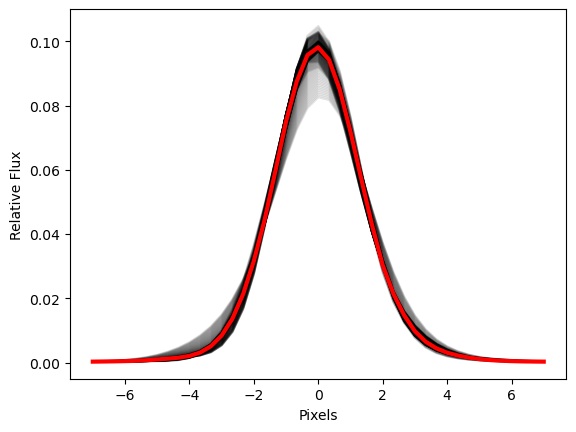

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-7.,7.,43)
for k in range(0,data.shape[0],100):
    plt.plot(x, data[k,:], c='k', alpha=0.1)
    
med = np.nanmedian(data, axis=0)
plt.plot(x, med, c='r', lw=3)
plt.xlabel('Pixels')
plt.ylabel('Relative Flux')

lsfx = x
lsfy = med/np.max(med)

In order to inject a signal into a spectrum, we must resample this LSF so it appears at the desired wavelength or pixel index, and multiply it by some constant to simulate different signal strengths. Here is a small function to do just that.

In [ ]:
test_laser_signature = np.interp(np.array(range(len(ds.wave)))-4500, lsfx, lsfy)

plt.figure(figsize=(12,4))

plt.plot(ds.wave, test_laser_signature)

plt.xlabel(r'$\lambda$ ($\AA$)')
plt.ylabel(r'Relative Flux')

plt.tight_layout()